In [1]:
# Import our dependencies

import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split

C:\Users\angel\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\angel\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\angel\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\angel\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\f

# Linear Data

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

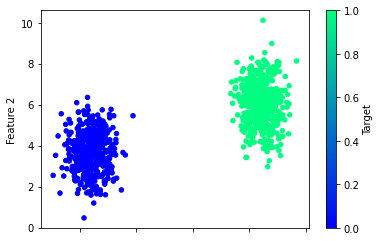

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Normalize our dummy data

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 156us/sample - loss: 0.7574 - acc: 0.0280
Epoch 2/100
750/750 [==============================] - 0s 33us/sample - loss: 0.7443 - acc: 0.0040
Epoch 3/100
750/750 [==============================] - 0s 33us/sample - loss: 0.7330 - acc: 0.0053
Epoch 4/100
750/750 [==============================] - 0s 29us/sample - loss: 0.7230 - acc: 0.0067
Epoch 5/100
750/750 [==============================] - 0s 32us/sample - loss: 0.7143 - acc: 0.0147
Epoch 6/100
750/750 [==============================] - 0s 29us/sample - loss: 0.7061 - acc: 0.0293
Epoch 7/100
750/750 [==============================] - 0s 32us/sample - loss: 0.6987 - acc: 0.1467
Epoch 8/100
750/750 [==============================] - 0s 27us/sample - loss: 0.6916 - acc: 0.4933
Epoch 9/100
750/750 [==============================] - 0s 35us/sample - loss: 0.6847 - acc: 0.4933
Epoch 10/100
750/750 [==============================] - 0s 32us/sample - loss: 0.6776 - acc: 0.4933
Epoch 11

750/750 [==============================] - 0s 33us/sample - loss: 0.1200 - acc: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 32us/sample - loss: 0.1179 - acc: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 31us/sample - loss: 0.1158 - acc: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 27us/sample - loss: 0.1138 - acc: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 34us/sample - loss: 0.1118 - acc: 1.0000
Epoch 88/100
750/750 [==============================] - 0s 35us/sample - loss: 0.1098 - acc: 1.0000
Epoch 89/100
750/750 [==============================] - 0s 43us/sample - loss: 0.1079 - acc: 1.0000
Epoch 90/100
750/750 [==============================] - 0s 40us/sample - loss: 0.1061 - acc: 1.0000
Epoch 91/100
750/750 [==============================] - 0s 40us/sample - loss: 0.1043 - acc: 1.0000
Epoch 92/100
750/750 [==============================] - 0s 39us/sample - loss: 0.1025 - acc: 1.0000
Epoch 93/100


<AxesSubplot:>

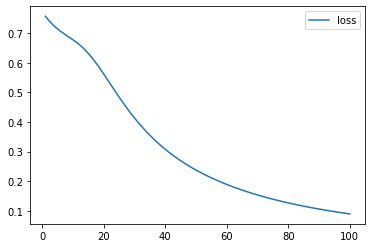

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss over the 100 epochs
history_df.plot(y="loss")

<AxesSubplot:>

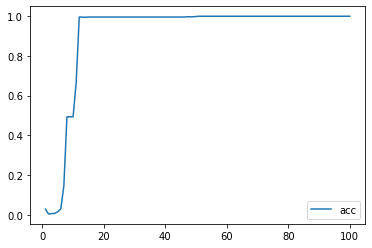

In [12]:
# Plot the accuracy over the 100 epochs
history_df.plot(y="acc")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0832 - acc: 1.0000
Loss: 0.08322389966249466, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

# Non-Linear Data

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

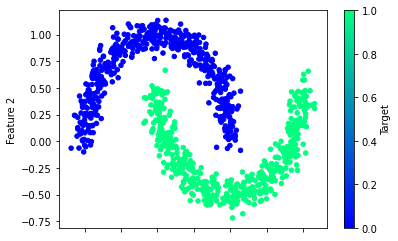

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 35us/sample - loss: 1.1691 - acc: 0.4227
Epoch 2/100
750/750 [==============================] - 0s 40us/sample - loss: 1.0517 - acc: 0.4373
Epoch 3/100
750/750 [==============================] - 0s 36us/sample - loss: 0.9690 - acc: 0.4547
Epoch 4/100
750/750 [==============================] - 0s 39us/sample - loss: 0.9130 - acc: 0.4707
Epoch 5/100
750/750 [==============================] - 0s 40us/sample - loss: 0.8725 - acc: 0.4813
Epoch 6/100
750/750 [==============================] - 0s 37us/sample - loss: 0.8416 - acc: 0.4907
Epoch 7/100
750/750 [==============================] - 0s 40us/sample - loss: 0.8173 - acc: 0.5080
Epoch 8/100
750/750 [==============================] - 0s 36us/sample - loss: 0.7969 - acc: 0.5200
Epoch 9/100
750/750 [==============================] - 0s 36us/sample - loss: 0.7799 - acc: 0.5320
Epoch 10/100
750/750 [==============================] - 0s 31us/sample - loss: 0.7645 - acc: 0.5453
Epoch 11/

750/750 [==============================] - 0s 39us/sample - loss: 0.4839 - acc: 0.7373
Epoch 84/100
750/750 [==============================] - 0s 39us/sample - loss: 0.4815 - acc: 0.7373
Epoch 85/100
750/750 [==============================] - 0s 40us/sample - loss: 0.4791 - acc: 0.7387
Epoch 86/100
750/750 [==============================] - 0s 41us/sample - loss: 0.4765 - acc: 0.7400
Epoch 87/100
750/750 [==============================] - 0s 37us/sample - loss: 0.4740 - acc: 0.7427
Epoch 88/100
750/750 [==============================] - 0s 37us/sample - loss: 0.4714 - acc: 0.7453
Epoch 89/100
750/750 [==============================] - 0s 35us/sample - loss: 0.4690 - acc: 0.7467
Epoch 90/100
750/750 [==============================] - 0s 35us/sample - loss: 0.4665 - acc: 0.7480
Epoch 91/100
750/750 [==============================] - 0s 37us/sample - loss: 0.4640 - acc: 0.7480
Epoch 92/100
750/750 [==============================] - 0s 37us/sample - loss: 0.4614 - acc: 0.7480
Epoch 93/100


<AxesSubplot:>

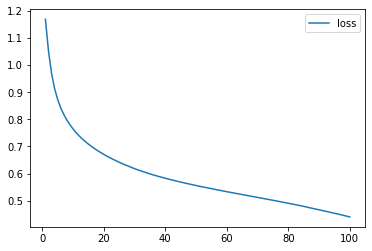

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

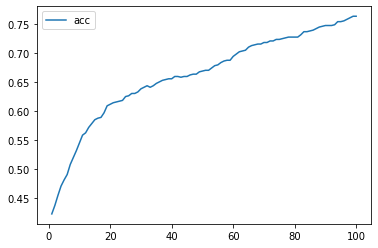

In [19]:
# Plot the loss
history_df.plot(y="acc")

# Multiple-Neuron Neural Network

In [20]:
# Since we want to change the structure of our neural network model, we 
# must first create a new Sequential model by adding and running the 
# following code to our notebook:

# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Using our new Sequential model, we’ll add our input, hidden, and output
# layers using the Dense class. However, this time we’ll create a hidden 
# layer with six neurons instead of one by changing the units parameter 
# while keeping all other parameters the same.

# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Now that our new Sequential model is defined, we need to compile and 
# train the model using our nonlinear moon-shaped dummy data. For us to 
# make direct comparisons with our single-neuron model, we’ll use the 
# same training parameters, including loss metric, optimizer function, 
# and number of epochs.

# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 125us/sample - loss: 0.7018 - acc: 0.6680
Epoch 2/100
750/750 [==============================] - 0s 50us/sample - loss: 0.6684 - acc: 0.6773
Epoch 3/100
750/750 [==============================] - 0s 52us/sample - loss: 0.6390 - acc: 0.6893
Epoch 4/100
750/750 [==============================] - 0s 51us/sample - loss: 0.6124 - acc: 0.7000
Epoch 5/100
750/750 [==============================] - 0s 44us/sample - loss: 0.5885 - acc: 0.7107
Epoch 6/100
750/750 [==============================] - 0s 41us/sample - loss: 0.5673 - acc: 0.7253
Epoch 7/100
750/750 [==============================] - 0s 43us/sample - loss: 0.5482 - acc: 0.7320
Epoch 8/100
750/750 [==============================] - 0s 40us/sample - loss: 0.5310 - acc: 0.7253
Epoch 9/100
750/750 [==============================] - 0s 33us/sample - loss: 0.5158 - acc: 0.7333
Epoch 10/100
750/750 [==============================] - 0s 32us/sample - loss: 0.5018 - acc: 0.7373
Epoch 11

750/750 [==============================] - 0s 32us/sample - loss: 0.2928 - acc: 0.8853
Epoch 84/100
750/750 [==============================] - 0s 31us/sample - loss: 0.2922 - acc: 0.8853
Epoch 85/100
750/750 [==============================] - 0s 33us/sample - loss: 0.2915 - acc: 0.8853
Epoch 86/100
750/750 [==============================] - 0s 33us/sample - loss: 0.2909 - acc: 0.8853
Epoch 87/100
750/750 [==============================] - 0s 33us/sample - loss: 0.2903 - acc: 0.8853
Epoch 88/100
750/750 [==============================] - 0s 37us/sample - loss: 0.2897 - acc: 0.8853
Epoch 89/100
750/750 [==============================] - 0s 40us/sample - loss: 0.2890 - acc: 0.8853
Epoch 90/100
750/750 [==============================] - 0s 43us/sample - loss: 0.2885 - acc: 0.8853
Epoch 91/100
750/750 [==============================] - 0s 43us/sample - loss: 0.2880 - acc: 0.8853
Epoch 92/100
750/750 [==============================] - 0s 47us/sample - loss: 0.2873 - acc: 0.8853
Epoch 93/100


# Optimizing a Neural Network

There are a few means of optimizing a neural network:

- Check out your input dataset.
- Add more neurons to a hidden layer. (Deep Learning)
- Add additional hidden layers.
- Use a different activation function for the hidden layers.
    1. The **sigmoid function** values are normalized to a probability between 0 and 1, which is ideal for binary classification.
    2. The **tanh function** can be used for classification or regression, and it expands the range between -1 and 1.
    3. The **ReLU function** is ideal for looking at positive nonlinear input data for classification or regression.
    4. The **Leaky ReLU function** is a good alternative for nonlinear input data with many negative inputs.
- Add additional epochs to the training regimen.